<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разделение на выборки</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Выбор локации для скважины

Для дальнейшего бурения нефтяных скважин необходимо найти наиболее подходящий регион.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 
Нужно построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. 
Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [3]:
!pip install seaborn -U

In [4]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Q-Q-plot
import statsmodels.api as sm

# models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [5]:
try:
    df1 = pd.read_csv('datasets/geo_data_0.csv')
    df2 = pd.read_csv('datasets/geo_data_1.csv')
    df3 = pd.read_csv('datasets/geo_data_2.csv')
except:
    df1 = pd.read_csv('/datasets/geo_data_0.csv')
    df2 = pd.read_csv('/datasets/geo_data_1.csv')
    df3 = pd.read_csv('/datasets/geo_data_2.csv')

Проверяем общую информацию о данных.

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Смотрим случайные пять строк данных для каждой скважины.

In [9]:
def sample(df):
    display(df.sample(5, random_state=12345))

In [10]:
sample(df1)

,id,f0,f1,f2,product
71751,7Z2gx,0.948970,-0.057547,2.095727,10.038645
80493,b2HU8,0.992974,0.206671,-0.142278,114.551489
2655,Y0dXD,1.199854,-0.563356,-1.852991,132.603635
53233,Mje59,0.691422,-0.433347,0.564974,169.072125
91141,yqXxU,0.420772,0.972638,0.736190,122.325180


In [11]:
sample(df2)

,id,f0,f1,f2,product
71751,aTbUt,-0.371866,-1.862494,3.002210,80.859783
80493,CK34V,9.015122,-13.881455,1.995363,53.906522
2655,ioXCO,-6.507568,-4.817448,1.003449,30.132364
53233,xk6tF,14.560845,-10.667755,1.995175,53.906522
91141,F9AmG,6.090476,-4.494723,0.013815,0.000000


In [12]:
sample(df3)

,id,f0,f1,f2,product
71751,DMlgl,-1.444717,-3.861599,2.225805,61.212375
80493,tbrRC,-1.418617,1.276544,-0.976433,41.850118
2655,JRs1w,-4.587649,-0.413199,1.649268,57.776581
53233,bidOx,1.871584,1.619101,4.273555,100.053761
91141,AcBBB,-2.028785,4.128167,6.089547,109.897122


Проверяем наличие полных дубликатов и дубликатов в столбце с идентификаторами.

In [13]:
def duplicated(df):
    print(df.duplicated().sum())
    print('--------')

In [14]:
duplicated(df1)
duplicated(df2)
duplicated(df3)

0
--------
0
--------
0
--------


Построим диаграммы размаха по каждому датафрейму.

In [33]:
def violin_qq(df):
    for column in df.columns.to_list():
        try:
            # violin plot
            plt.figure(figsize=(9,  5))
            sns.violinplot(data=df[column])

            plt.title('Диаграмма размаха ' + column)
            plt.ylabel(column)
            plt.show()
            
            # qq plot
            sm.qqplot(df.loc[df[column].notna()][column], fit=True, line="45")
            plt.show()
        except:
            pass

<Figure size 648x360 with 0 Axes>

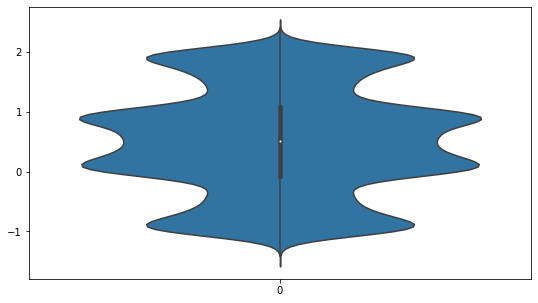

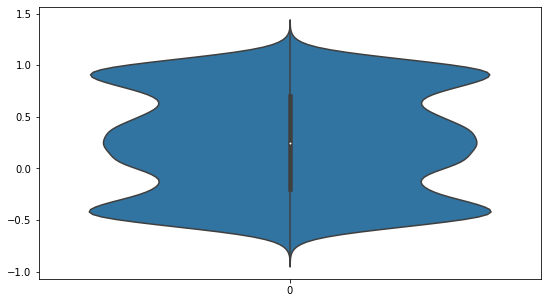

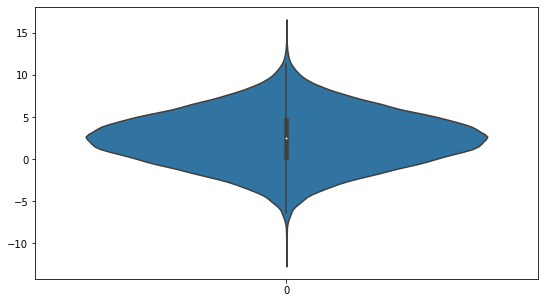

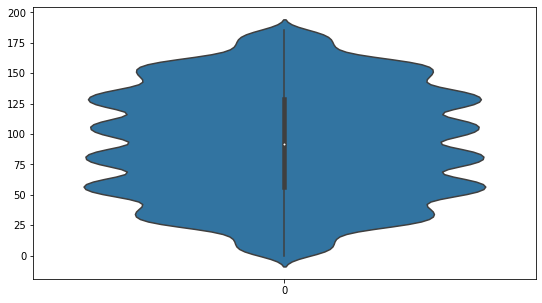

In [34]:
violin_qq(df1)

<Figure size 648x360 with 0 Axes>

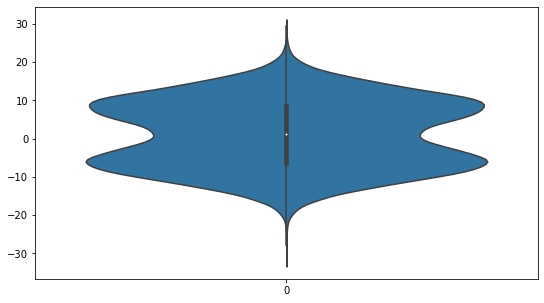

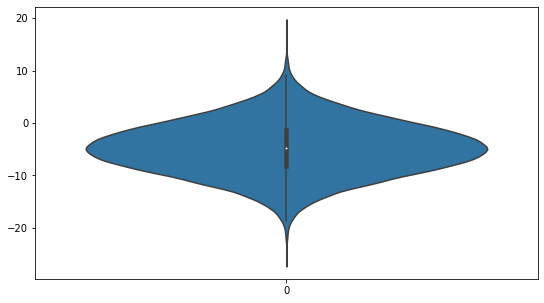

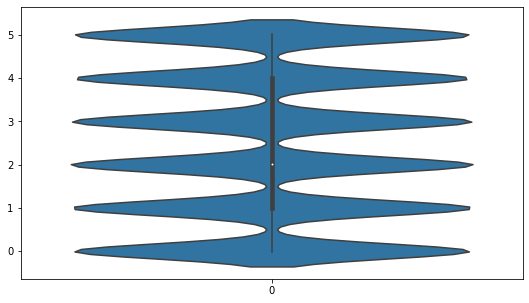

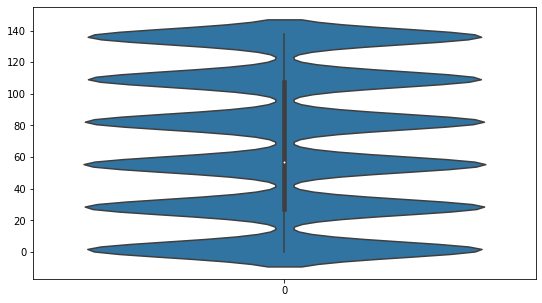

In [35]:
violin_qq(df2)

<Figure size 648x360 with 0 Axes>

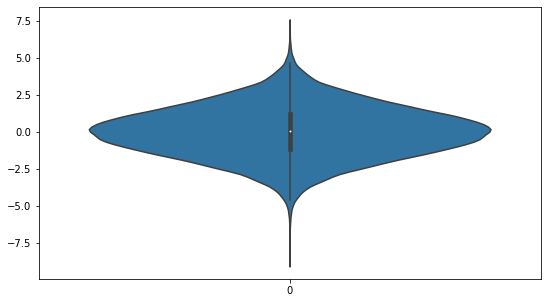

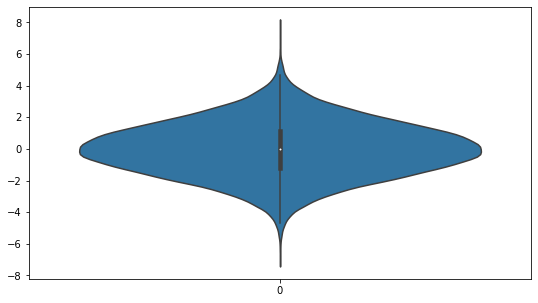

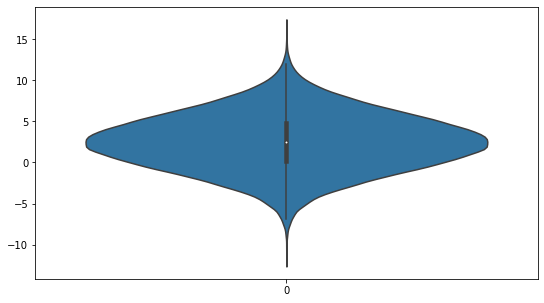

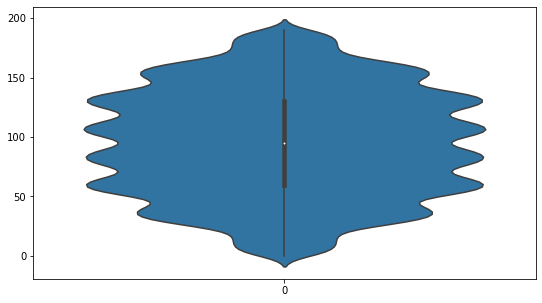

In [36]:
violin_qq(df3)

Проверим зависимость признаков в данных и нормальность распределений признаков.

In [15]:
def corr_matrix(df, region):
    print("Корреляция и распределение признаков по региону", region)
    plt.figure(figsize=(9, 4))
    sns.heatmap(df.corr(), annot=True)
    
    pd.plotting.scatter_matrix(df, alpha=0.9, figsize=(7, 7), diagonal="kde")
    plt.title = "Зависимость признаков"

Корреляция и распределение признаков по региону 1


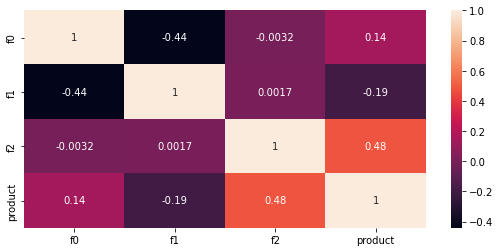

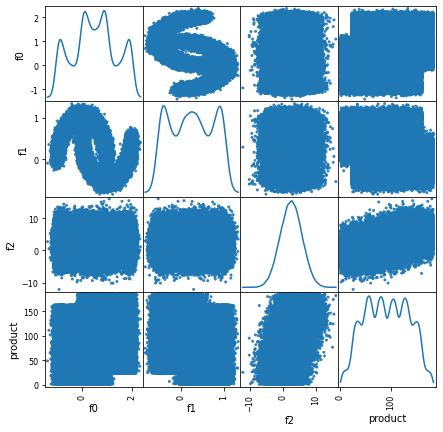

In [16]:
corr_matrix(df1, 1)

Корреляция и распределение признаков по региону 2


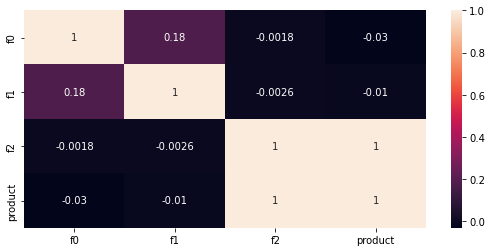

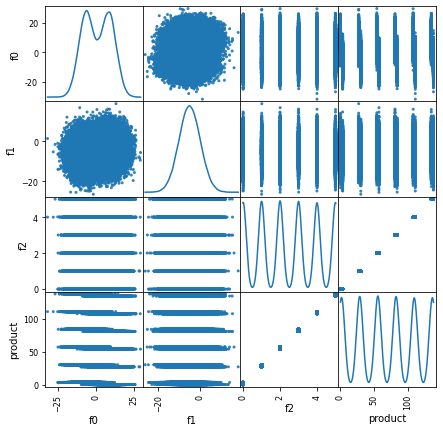

In [17]:
corr_matrix(df2, 2)

Корреляция и распределение признаков по региону 3


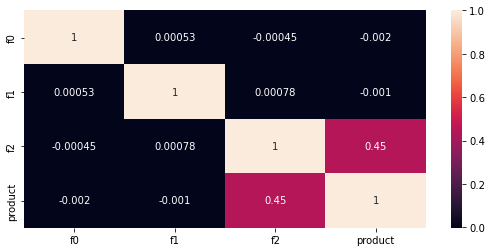

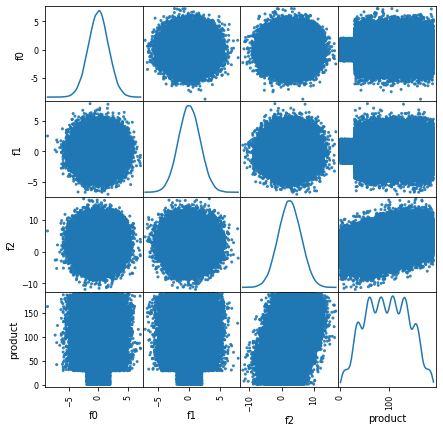

In [18]:
corr_matrix(df3, 3)

### Вывод

Имеются три файла с данными, каждых из которых содержит 100 000 строк.
Пропуски значений отсутсвуют. Полных дубликатов не выявлено.

Наиболее заметная корреляция с целевым признаком присутсвует в данных для региона 2.
Признаки регионов 1 и 3 распределены нормально. 
Признаки региона 2 не все имеют нормальное распредение.

## Разделение на выборки

Выделяем целевой признак в отдельный список и избавляемся от незначимого признака "id" для корректного обучения модели.

In [17]:
# функция для разделения на обучающие признаки и целевой признак
# удаление незначимого признака

def samples(df):
    features = df.drop('product', axis=1).drop('id', axis=1)
    target =df['product']
    print(features.shape)
    print(target.shape)
    return features, target

In [18]:
(features1, target1) = samples(df1)

(100000, 3)
(100000,)


In [19]:
(features2, target2) = samples(df2)

(100000, 3)
(100000,)


In [20]:
(features3, target3) = samples(df3)

(100000, 3)
(100000,)


Разделяем выборки на обучающую и валидационную.

In [21]:
features1_train, features1_valid, target1_train, target1_valid = train_test_split(features1, target1, test_size=.25, random_state=12345)

In [22]:
features2_train, features2_valid, target2_train, target2_valid = train_test_split(features2, target2, test_size=.25, random_state=12345)

In [23]:
features3_train, features3_valid, target3_train, target3_valid = train_test_split(features3, target3, test_size=.25, random_state=12345)

### Вывод

Целевой признак вынесен в отдельную таблицу и удален столбец с идентификаторами скважин, т.к. он является незначимым для обучения моделей.

Данные разделены на две выборки: обучающую и валидационную в соотношении 75:25 и готовы к дальнейшему обучению.

## Обучение и проверка модели

Для обучения выбераем модель линейной регрессии как наиболее предсказуемую.

Рассчитываем показатель RMSE для валидационной выборки и константной модели, которая всегда предсказывает среднее значение на основе обучающей выборки.

In [24]:
# функция для обучения модели линейной регрессии, создание константной модели, 
# подсчета rmse модели и константной модели

def model(features_train, target_train, features_valid, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    
    # считаем средний запас скважин по региону на основе предсказаний
    mean = round(predicted_valid.mean(), 2)
    
    # считаем среднюю квадратичную ошибку модели
    rmse = mean_squared_error(target_valid, predicted_valid) ** 0.5
    rmse = rmse.round(2)
    
    # создаем константную модель, которая всегда предсказывает среднее значение
    predicted_valid_constant = pd.Series(target_train.mean(), index=target_valid.index)
    rmse_c = mean_squared_error(target_valid, predicted_valid_constant) ** 0.5
    rmse_c = rmse_c.round(2)
    # считаем средний запас скважин по региону на основе предсказаний константной модели
    mean_c = predicted_valid_constant.mean()
    
    # сохраняем rmse и средние показатели
    data = [[rmse, rmse_c], [mean, mean_c]]
    
    # сохраняем предсказания в объект Series для создания выборок
    reset_predictions = pd.Series(predicted_valid) 
    # сбрасываем индекс в целевом признаке для создания выборок
    reset_target = target_valid.reset_index(drop=True) 
    
    return predicted_valid, data, model, reset_predictions, reset_target

In [25]:
predicted_valid1, data1, model1, reset_predictions1, reset_target1 = model(features1_train, target1_train, features1_valid, target1_valid)

In [26]:
predicted_valid2, data2, model2, reset_predictions2, reset_target2 = model(features2_train, target2_train, features2_valid, target2_valid)

In [27]:
predicted_valid3, data3, model3, reset_predictions3, reset_target3 = model(features3_train, target3_train, features3_valid, target3_valid)

Добавим полученные результаты в общую таблицу.

In [28]:
columns = ['модель', 'константная модель']

index = ['rmse 1', 'mean 1']
results1 = pd.DataFrame(data=data1, index=index, columns=columns)
index = ['rmse 2', 'mean 2']
results2 = pd.DataFrame(data=data2, index=index, columns=columns)
index = ['rmse 3', 'mean 3']
results3 = pd.DataFrame(data=data3, index=index, columns=columns)

In [29]:
results_rmse_mean = results1.append(results2).append(results3)
results_rmse_mean

,модель,константная модель
rmse 1,37.58,44.290000
mean 1,92.59,92.640468
rmse 2,0.89,46.020000
mean 2,68.73,68.858955
rmse 3,40.03,44.900000
mean 3,94.97,95.038589


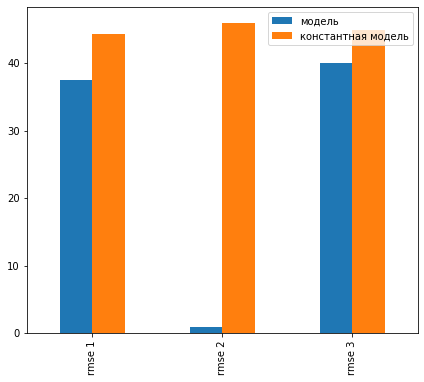

In [30]:
fig = results_rmse_mean.filter(like ='rmse', axis=0).plot(kind='bar', figsize=(7, 6))
plt.show()

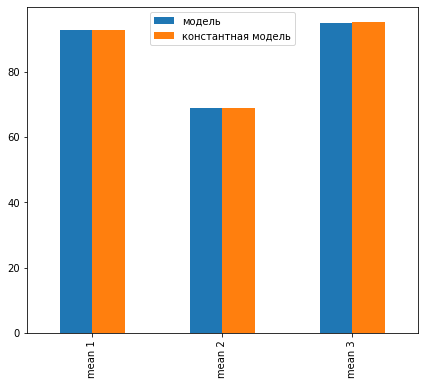

In [31]:
results_rmse_mean.filter(like ='mean', axis=0).plot(kind='bar', figsize=(7, 6))
plt.show()

### Вывод

Наиболее надежные результаты модель показывает на данных по второму региону, где RMSE = 0.89.

В остальных регионах модель показывает большое количество ошибочных предсказаний, которых даже больше, чем у константных моделей.

Предсказан средний запас скважин по регионам, который будет сравниваться далее с пороговым уровнем для получения прибыли.

## Подготовка к расчёту прибыли

Сохраним ключевые значения для расчётов в отдельных переменных. 

In [32]:
BUDGET = 10000000000 # бюджет на разработку скважин в регионе
PRICE = 450000 # текущая цена за 1000 баррелей 
SAMPLE_SIZE = 500 # количество скважин для исследования (размер выборки)
SUBSAMPLE_SIZE = 200 # количество скважин для отбора лучших (сортируем выборку и отбираем 200 лучших из 500)
THRESHOLD = 0.025 # пороговое значение для вероятности убытков

In [33]:
profit_threshold_1000barrels = BUDGET / SUBSAMPLE_SIZE / PRICE 

In [34]:
means = pd.Series(data=[profit_threshold_1000barrels, 
                        target1_valid.mean(), 
                        target2_valid.mean(), 
                        target3_valid.mean()],
    index=['Пороговое кол-во для прибыли (тыс. баррелей)', 
           'Средний запас по региону 1 (тыс. баррелей)', 
           'Средний запас по региону 2 (тыс. баррелей)', 
           'Средний запас по региону 3 (тыс. баррелей)']
         )
means

Пороговое кол-во для прибыли (тыс. баррелей)    111.111111
Средний запас по региону 1 (тыс. баррелей)       92.078597
Средний запас по региону 2 (тыс. баррелей)       68.723136
Средний запас по региону 3 (тыс. баррелей)       94.884233
dtype: float64

In [35]:
means = pd.Series(data=[target1_valid.mean(), 
                        target2_valid.mean(), 
                        target3_valid.mean()],
    index=['Регион 1', 
           'Регион 2', 
           'Регион 3']
         )
means

Регион 1    92.078597
Регион 2    68.723136
Регион 3    94.884233
dtype: float64

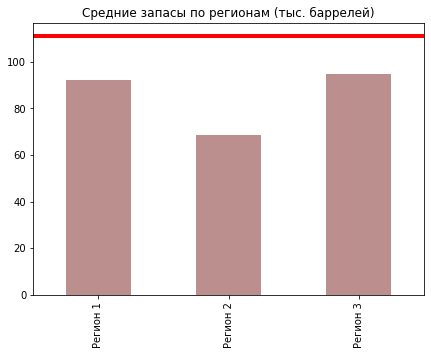

In [62]:
means.plot(kind='bar', figsize=(7, 5), title='Средние запасы по регионам (тыс. баррелей)', color='rosybrown')
x, y = [-50, 111], [111, 111]
plt.plot(x, y, marker = 'o', linewidth=4, color='red')
plt.show()

### Вывод

Средний запас скважин в регионе недостаточно высок для безубыточной разработки скважин, поэтому необходимо отобрать лучшие 200 скважин с большими показателями, чем 111 тысяч баррелей для получения прибыли.

## Расчёт прибыли и рисков 

Рассчитаем прибыль 200 лучших скважин из общей выборки предсказаний по каждому региону.
Построим распределение предсказанных и целевых запасов всех скважин по каждому региону.

In [37]:
# функция для расчета прибыли 200 лучших скважин из выборки
def profit(predicted_valid, target_valid, region, print_sum=False):
    predicted_valid = predicted_valid.sort_values(ascending = False)
    selected = target_valid.loc[predicted_valid.index][:SUBSAMPLE_SIZE]
    profit = round(PRICE * selected.sum() - BUDGET)
    
    if print_sum == True:
        print("Суммарная прибыль для лучших 200 скважин в регионе", 
              str(region) + ":", 
              round((profit / 1000000), 2), "млн. рублей.")
        print("Средняя прибыль для лучших 200 скважин в регионе", 
              str(region) + ":", 
              round((profit / selected.count() / 1000000), 2), "млн. рублей.")
        
    return profit

In [39]:
# функция для построения распределения предсказанных и целевых запасов всех скважин
def hist_profit(predicted_valid, target_valid, region):
    plt.figure(figsize=(10, 6))
    
    sns.histplot(target_valid,
                 color="olive", 
                 label="Объем скважины", 
                 kde=True
                ).set(
        title='Распределение запасов всех скважин в регионе', 
        xlabel='Объем скважины (тыс. баррелей)',
        ylabel='Частота')
        
    sns.histplot(predicted_valid, 
                 color="salmon", 
                 label="Предсказанный объем скважины", 
                 kde=True)
    plt.legend()
    plt.show()

In [40]:
profit1 = profit(reset_predictions1, reset_target1, 1, True)

Суммарная прибыль для лучших 200 скважин в регионе 1: 3320.83 млн. рублей.
Средняя прибыль для лучших 200 скважин в регионе 1: 16.6 млн. рублей.


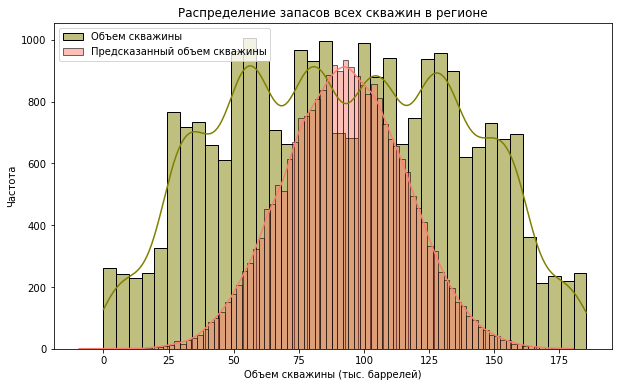

In [41]:
hist_profit(reset_predictions1, reset_target1, 1)

In [42]:
profit2 = profit(reset_predictions2, reset_target2, 2, True)

Суммарная прибыль для лучших 200 скважин в регионе 2: 2415.09 млн. рублей.
Средняя прибыль для лучших 200 скважин в регионе 2: 12.08 млн. рублей.


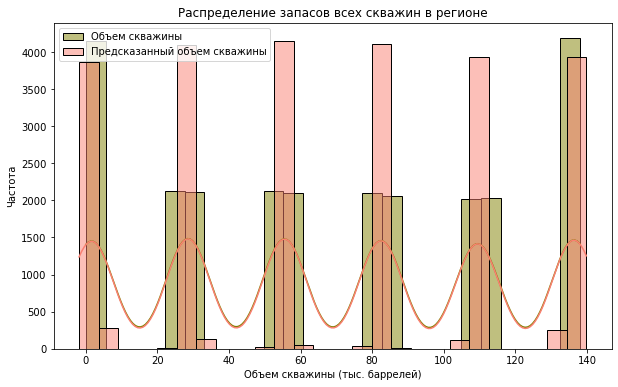

In [43]:
hist_profit(reset_predictions2, reset_target2, 2)

In [42]:
profit3 = profit(reset_predictions3, reset_target3, 3, True)

Суммарная прибыль для лучших 200 скважин в регионе 3: 2710.35 млн. рублей.
Средняя прибыль для лучших 200 скважин в регионе 3: 13.55 млн. рублей.


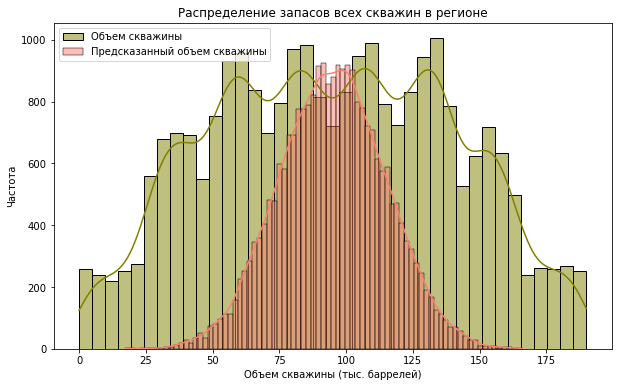

In [44]:
hist_profit(reset_predictions3, reset_target3, 3)

Применим процедуру Bootstrap, чтобы оценить доверительный интервал прибыли для каждого региона и оценить вероятность убытков.

In [47]:
state = np.random.RandomState(5555)

In [52]:
# функция для проведения Bootstrap с использованием 1000 выборок с 500 значениями

def bootstrap(reset_predictions, reset_target, region):
    values = []
    for i in range(1000):
        target_subsample = reset_target.sample(n=SAMPLE_SIZE, replace=True, random_state=state)
        predicted_subsample = reset_predictions.loc[target_subsample.index]
        
        # считаем прибыль топ-200 скважин из полученной выборки c 500 скважинами
        values.append(profit(predicted_subsample, target_subsample, region))
    
    # добавляем суммарную прибыль каждой выборки в общий список
    values = pd.Series(values)
    
    # гистограмма распределения прибыли по всем выборкам
    plt.figure(figsize=(8, 5))
    sns.histplot(values, label='Прибыль', color='lightseagreen').set(
        title='Распределение прибыли лучших 200 скважин на основе 1000 выборок в регионе',  
        xlabel='Прибыль (млрд. рублей)', 
        ylabel='Частота')
    plt.legend() 
    plt.show()
    
    print("Средняя предполагаемая прибыль в регионе", region, 
          "на основе лучших предсказанных 200 скважин:")
    print(round(values.mean()), 'рублей.')
    print('------------------------')
    
    # находим 95% доверительный интервал прибыли
    upper = values.quantile(.025)
    lower = values.quantile(.975)
    print("95% доверительный интервал предполагаемого дохода в регионе:")
    print(str(upper) + ",", lower)
    print('------------------------')
    
    # находим вероятность убытков т.е вероятность отрицательной прибыли
    probability = round((values.loc[values < 0].mean()) * 100)
    print("Вероятность убытков для региона", str(region) + ":", probability, "%")

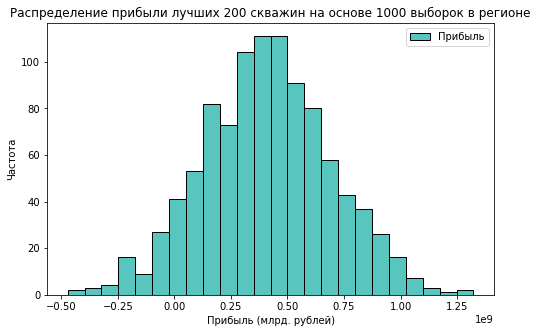

Средняя предполагаемая прибыль в регионе 1 на основе лучших предсказанных 200 скважин:
409414475 рублей.
------------------------
95% доверительный интервал предполагаемого дохода в регионе:
-156656887.47499996, 959974157.9749999
------------------------
Вероятность убытков для региона 1: 7 %


In [49]:
bootstrap(reset_predictions1, reset_target1, 1)

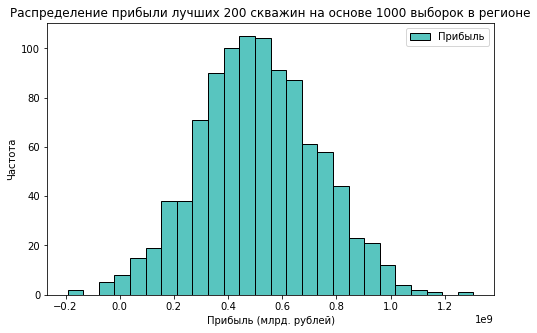

Средняя предполагаемая прибыль в регионе 2 на основе лучших предсказанных 200 скважин:
509255508 рублей.
------------------------
95% доверительный интервал предполагаемого дохода в регионе:
83135647.05, 940792041.7499999
------------------------
Вероятность убытков для региона 2: 1 %


In [50]:
bootstrap(reset_predictions2, reset_target2, 2)

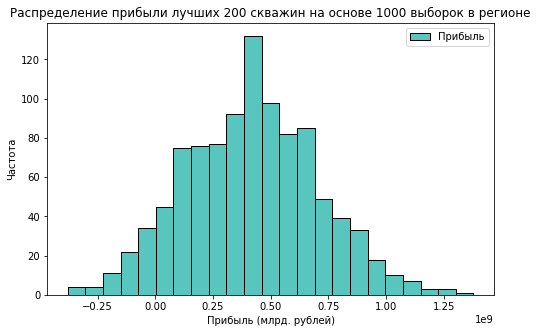

Средняя предполагаемая прибыль в регионе 3 на основе лучших предсказанных 200 скважин:
417300452 рублей.
------------------------
95% доверительный интервал предполагаемого дохода в регионе:
-122613725.69999999, 988786840.8999999
------------------------
Вероятность убытков для региона 3: 7 %


In [51]:
bootstrap(reset_predictions3, reset_target3, 3)

### Вывод

Вероятность убытков менее 2.5% возможна только для региона 2 (около 1%), 
в регионах 1 и 3 вероятность убытков заметно выше (13% и 7% соответственно).

Нижняя граница 95% доверительного интервала является положительной только в регионе 2.

Средняя и суммарная предсказанная прибыль также выше всего в регионе 2, 
соответственно, наиболее прибыльный регион для разработки это регион 2.

## Общий вывод

Исследованы данные по трем регионам. 
Обучена и протестирована модель линейной регрессии на валидационных выборках, 
которая показала наилучший результат в регионе 2 с RMSE 0.89.

Определена нижняя граница объема скважины для получения прибыли - 111 тыс. баррелей.
Подсчитаны средние запасы для каждого региона - 
средний запас во всех регионах недостаточно высок для получения прибыли. 

Рассчитана суммарная и средняя прибыль для предсказанных лучших 200 скважин каждого региона - 
она значительно выше общей прибыли региона. 
Следовательно, наиболее выгодно построить модель для предсказаний региона разработки скважин.

Проведена процедура Bootstrap для 1000 выборок для каждого региона с выборкой из 500 скважин,
из которых были отобраны 200 лучших скважин для подсчета потенциальной прибыли.


По итогам тестирования, рекомендован регион 2 для дальнейшей разработки скважин как наиболее доходный регион, в котором на основе лучших 200 скважин:
* риск убытков ~ 1%;
* средняя предполагаемая прибыль ~ 509.26 млн. рублей;
* 95% доверительный интервал прибыли (83135647.05 рублей, 940792041.7499999 рублей).
